In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Tweets.csv')
df.shape


(14640, 15)

In [6]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
df.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [8]:
df.dtypes #check data type of each column

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [9]:
df[df.duplicated()] # Check duplicated rows

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [ ]:
df[df['tweet_id'] == 570308309682675712]

In [10]:
df.describe() #generate descriptive statistics for numeric columns by default

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [12]:
df.describe(include = 'all') #generate descriptive statistics for all columns. The top is the most common value. The freq is the most common value’s frequency.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
df.isnull().sum() #check number of missing values in each column

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Checking the columns with most NaN counts.

In [31]:
column_names = df.columns.tolist()
print(column_names)

nan_counts = df.isnull().sum()
print(nan_counts)

['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [32]:
tweet_id_counts = df['tweet_id'].value_counts()
duplicate_tweet_ids = tweet_id_counts[tweet_id_counts > 1]
print(duplicate_tweet_ids)

tweet_id
570308309682675712    2
570308064185880577    2
570307949614256128    2
570307948171423745    2
570307434113310720    2
                     ..
569680231012773888    2
569622568459636736    2
569621879633391616    2
569601363799359488    2
569600137296633856    2
Name: count, Length: 155, dtype: int64


In [33]:
unique_locations = df['tweet_location'].unique()
print(len(unique_locations))

3082


Southwest
570


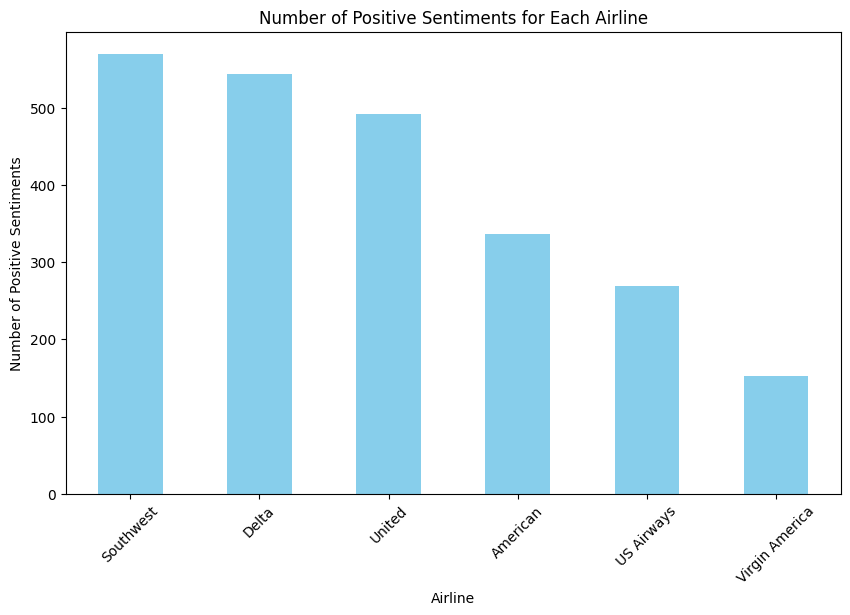

In [14]:
positive_sentiment_df = df[df['airline_sentiment'] == 'positive']
positive_airline_counts = positive_sentiment_df['airline'].value_counts()

most_positive_airline = positive_airline_counts.idxmax()
most_positive_count = positive_airline_counts.max()

print(most_positive_airline)
print(most_positive_count)

plt.figure(figsize=(10, 6))
positive_airline_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Positive Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Positive Sentiments')
plt.xticks(rotation=45)
plt.show()

United
2633


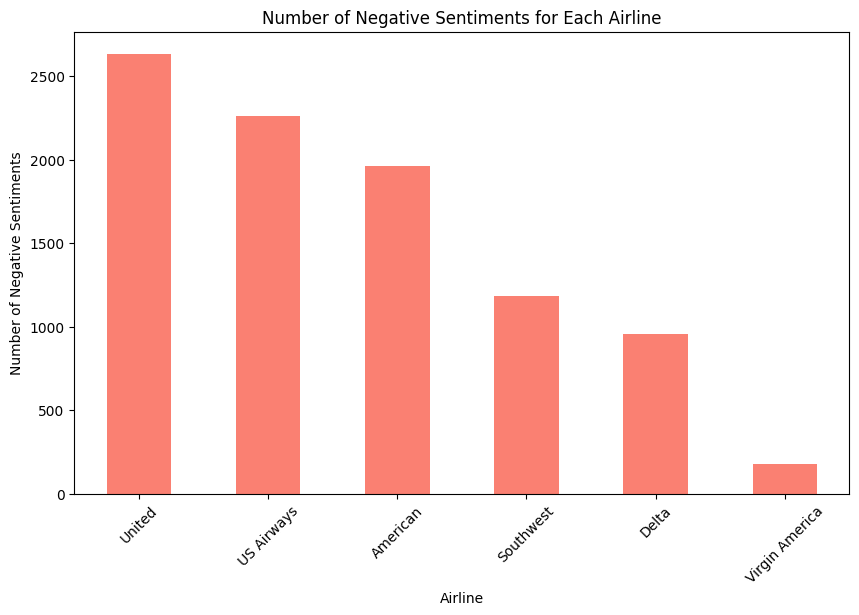

In [35]:
negative_sentiment_df = df[df['airline_sentiment'] == 'negative']
negative_airline_counts = negative_sentiment_df['airline'].value_counts()

most_negative_airline = negative_airline_counts.idxmax()
most_negative_count = negative_airline_counts.max()

print(most_negative_airline)
print(most_negative_count)

plt.figure(figsize=(10, 6))
negative_airline_counts.plot(kind='bar', color='salmon')
plt.title('Number of Negative Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Sentiments')
plt.xticks(rotation=45)
plt.show()

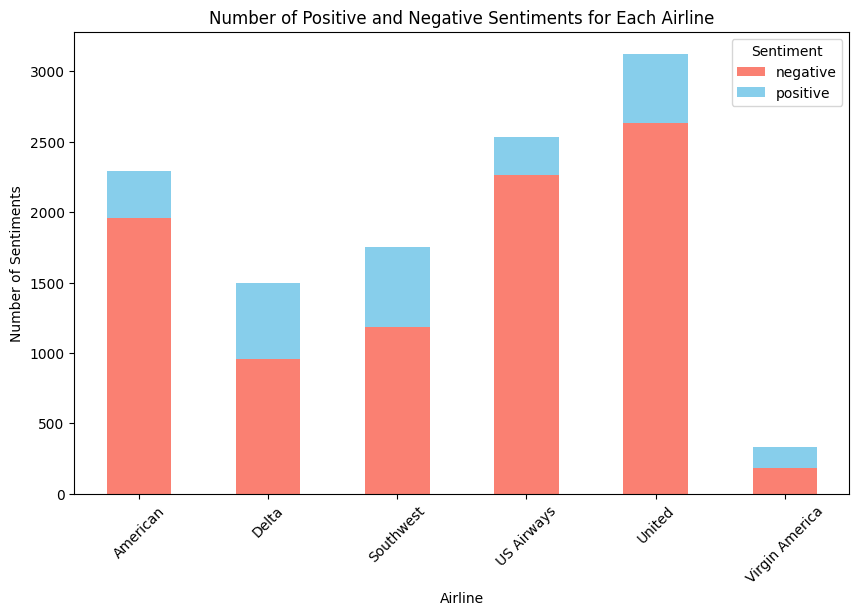

In [36]:
filtered_df = df[df['airline_sentiment'].isin(['positive', 'negative'])]
sentiment_counts = filtered_df.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Number of Positive and Negative Sentiments for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Sentiments')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

In [37]:
filtered_df = df.drop(columns=['tweet_id', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_location'])
filtered_df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,tweet_created,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...
14635,positive,0.3487,NaN,0.0000,American,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800,NaN
14636,negative,1.0000,Customer Service Issue,1.0000,American,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800,NaN
14637,neutral,1.0000,NaN,NaN,American,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800,NaN
14638,negative,1.0000,Customer Service Issue,0.6659,American,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800,Eastern Time (US & Canada)


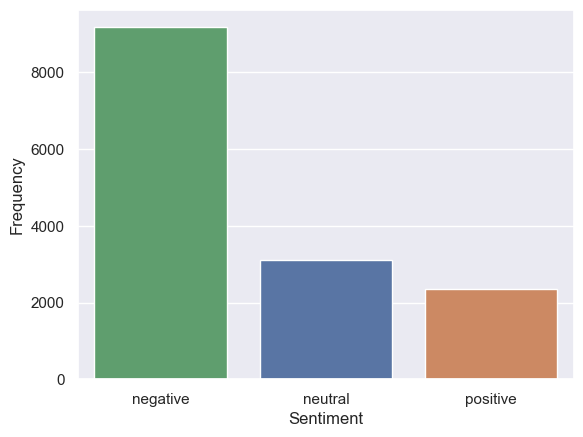

In [18]:
# Barplot shows the number neutral, positive and neguative reviews.
sns.set(style="darkgrid")
sns.countplot(x = 'airline_sentiment', data = df, order = df['airline_sentiment'].value_counts().index, hue = 'airline_sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

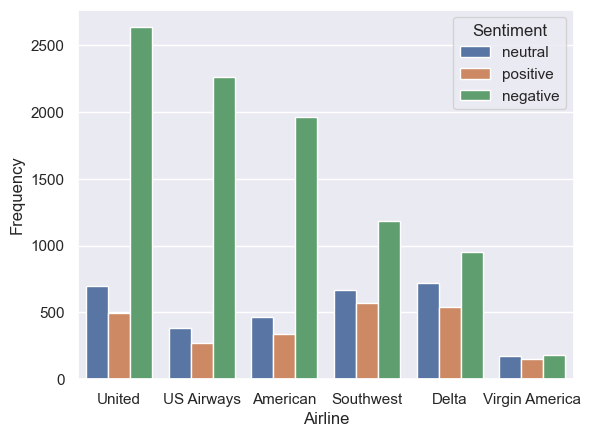

In [20]:
# barplot shows review numbers of each airline, as well as the frequency of sentiment
sns.set(style="darkgrid")
sns.countplot(x = 'airline', data = df, hue = 'airline_sentiment', order = df['airline'].value_counts().index)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend().set_title('Sentiment')
plt.show()

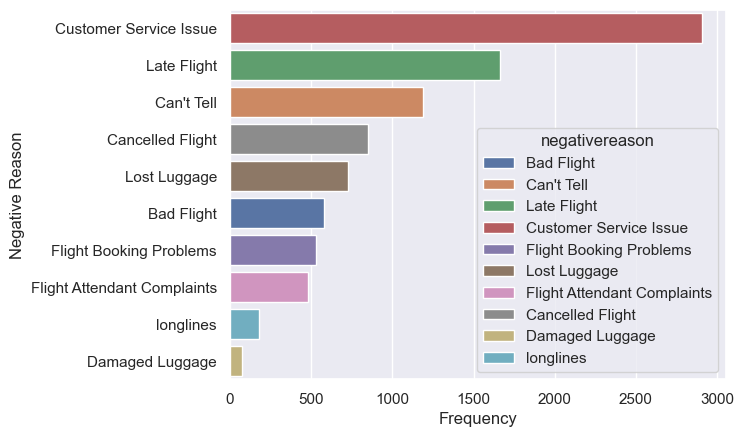

In [21]:
# barplot shows the frequency of the different negative reasons          
sns.set(style="darkgrid")
sns.countplot(y = 'negativereason', data = df, order = df['negativereason'].value_counts().index, hue = 'negativereason')
plt.xlabel('Frequency')
plt.ylabel('Negative Reason')
plt.show()

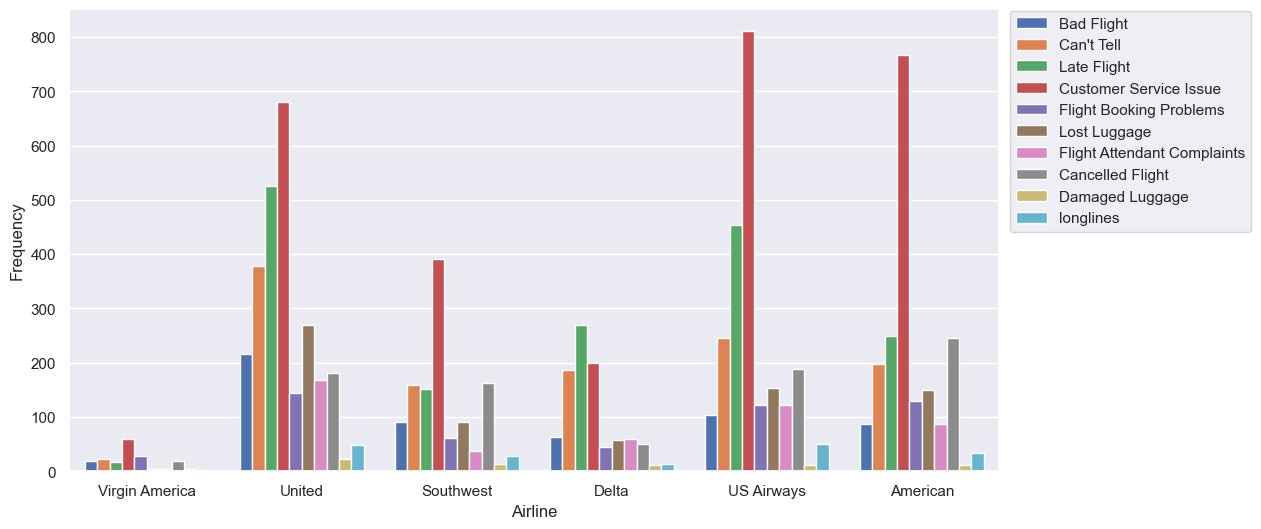

In [22]:
# barplot shows the distribution of negative reasons on each airlines
plt.figure(figsize=(12, 6))
sns.countplot(x = 'airline', data = df, hue = 'negativereason', saturation = True)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor = (1.01, 1), loc = 2, borderaxespad = 0.1)
plt.show() 

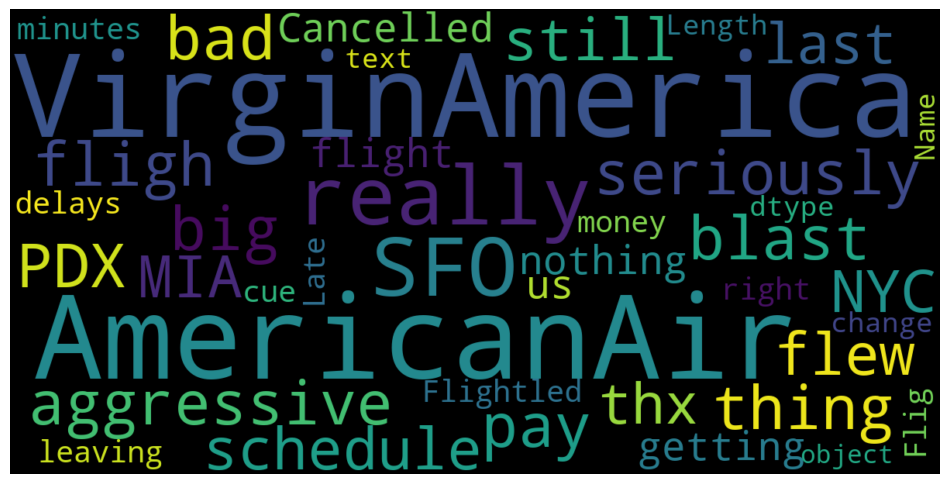

In [24]:
# show word cloud graph
from wordcloud import WordCloud, STOPWORDS
stopwords_forCloud = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'black',
        #contour_width = 3, 
        #contour_color = 'steelblue',
        stopwords = stopwords_forCloud,
        max_words = 80,
        max_font_size = 50, 
        scale = 3,
        random_state = 1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

# show word cloud with negative sentiment
airline_neg = df.loc[df['airline_sentiment'] == 'negative']   # select rows with negative sentiment
show_wordcloud(airline_neg['text'])     

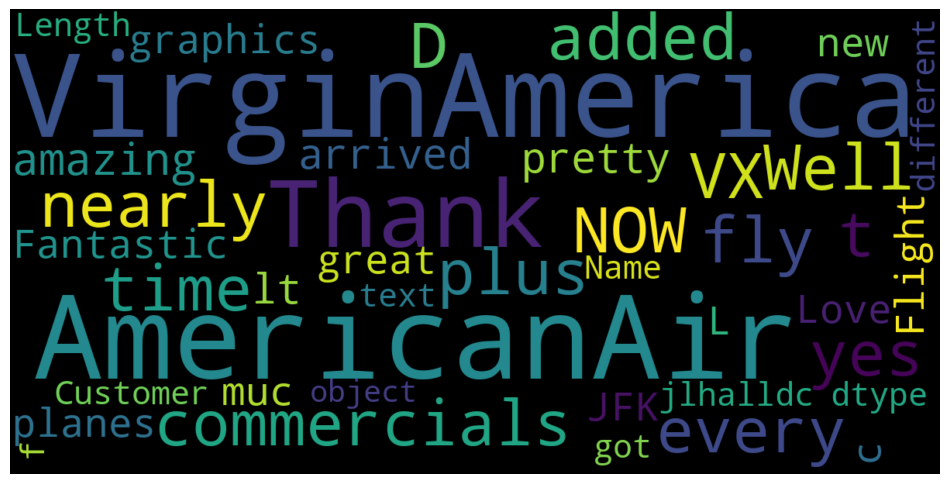

In [25]:
# show word cloud with positive sentiment
airline_neg = df.loc[df['airline_sentiment'] == 'positive']   # select rows with positive sentiment
show_wordcloud(airline_neg['text'])     

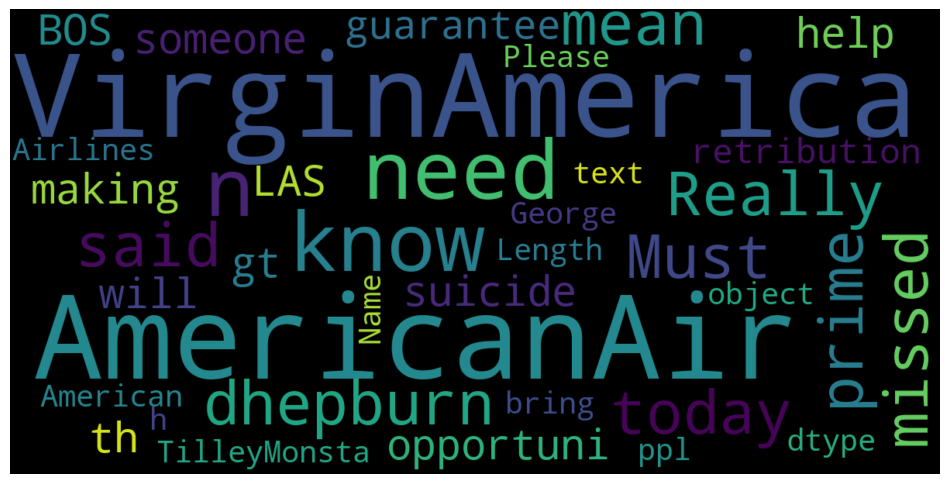

In [26]:
# show word cloud with neutral sentiment
airline_neg = df.loc[df['airline_sentiment'] == 'neutral']   # select rows with neutral sentiment
show_wordcloud(airline_neg['text'])     

In [27]:
df.loc[:, ('airline_sentiment', 'text')].isnull().sum() 

airline_sentiment    0
text                 0
dtype: int64